(reactions)=
# Reactions

## Complete examples

### Simple

```{math}
\ce{A + B ->[k] C}
```

In [39]:
import festim as F
import numpy as np

my_model = F.HydrogenTransportProblem()

A = F.Species("A")
B = F.Species("B")
C = F.Species("C", mobile=False)
my_model.species = [A, B, C]

my_model.mesh = F.Mesh1D(np.linspace(0, 1, 100))

left_surf = F.SurfaceSubdomain1D(id=1, x=0)
right_surf = F.SurfaceSubdomain1D(id=2, x=1)

# assumes the same diffusivity for all species
material = F.Material(D_0=1, E_D=0)

vol = F.VolumeSubdomain1D(id=1, borders=[0, 1], material=material)

my_model.subdomains = [vol, left_surf, right_surf]

my_model.reactions = [
    F.Reaction(
        reactant=[A, B],
        product=[C],
        k_0=0.01,
        E_k=0,
        # reverse reaction with a rate of zero
        p_0=0,
        E_p=0,
        volume=vol,
    )
]

my_model.boundary_conditions = [
    # A BCs
    F.FixedConcentrationBC(left_surf, value=10, species=A),
    F.FixedConcentrationBC(right_surf, value=0, species=A),
    # B BCs
    F.FixedConcentrationBC(left_surf, value=0, species=B),
    F.FixedConcentrationBC(right_surf, value=5, species=B),
]

my_model.temperature = 300

my_model.settings = F.Settings(atol=1e-10, rtol=1e-10, final_time=50)

my_model.settings.stepsize = F.Stepsize(1)

my_model.initialise()
my_model.run()

Solving HydrogenTransportProblem:   0%|          | 0.00/50.0 [00:00<?, ?it/s]

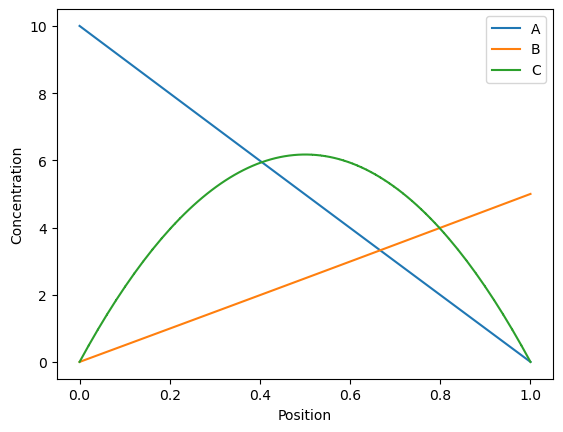

In [37]:
import matplotlib.pyplot as plt

def plot_profile(species, **kwargs):
    index = my_model.species.index(species)
    V0, dofs = my_model.function_space.sub(index).collapse()
    coords = V0.tabulate_dof_coordinates()[:, 0]
    sort_coords = np.argsort(coords)
    c = my_model.u.x.array[dofs][sort_coords]
    x = coords[sort_coords]
    return plt.plot(x, c, **kwargs)

for species in my_model.species:
    plot_profile(species, label=species.name)

plt.xlabel('Position')
plt.ylabel('Concentration')
plt.legend()
plt.show()

### Two-way reaction

```{math}
\ce{A + B <-->[k][p] C}
```

In [40]:
my_model = F.HydrogenTransportProblem()

A = F.Species("A")
B = F.Species("B")
C = F.Species("C", mobile=False)
my_model.species = [A, B, C]

my_model.mesh = F.Mesh1D(np.linspace(0, 1, 100))

left_surf = F.SurfaceSubdomain1D(id=1, x=0)
right_surf = F.SurfaceSubdomain1D(id=2, x=1)

# assumes the same diffusivity for all species
material = F.Material(D_0=1, E_D=0)

vol = F.VolumeSubdomain1D(id=1, borders=[0, 1], material=material)

my_model.subdomains = [vol, left_surf, right_surf]

my_model.reactions = [
    F.Reaction(
        reactant=[A, B],
        product=[C],
        k_0=0.01,
        E_k=0,
        p_0=0.1,
        E_p=0,
        volume=vol,
    )
]

my_model.boundary_conditions = [
    # A BCs
    F.FixedConcentrationBC(left_surf, value=10, species=A),
    F.FixedConcentrationBC(right_surf, value=0, species=A),
    # B BCs
    F.FixedConcentrationBC(left_surf, value=0, species=B),
    F.FixedConcentrationBC(right_surf, value=5, species=B),
]

my_model.temperature = 300

my_model.settings = F.Settings(atol=1e-10, rtol=1e-10, final_time=50)

my_model.settings.stepsize = F.Stepsize(1)

my_model.initialise()
my_model.run()

Solving HydrogenTransportProblem:   0%|          | 0.00/50.0 [00:00<?, ?it/s]

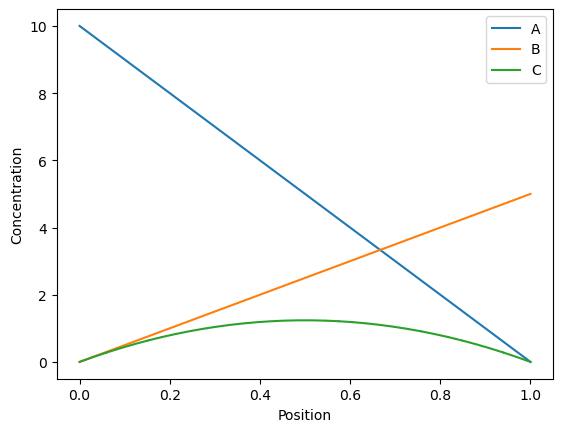

In [41]:
for species in my_model.species:
    plot_profile(species, label=species.name)

plt.xlabel('Position')
plt.ylabel('Concentration')
plt.legend()
plt.show()

### Chain reaction

```{math}
\ce{A + B <-->[k_1][p_1] C}
```

```{math}
\ce{C ->[k_2] D}
```

In [44]:
my_model = F.HydrogenTransportProblem()

A = F.Species("A")
B = F.Species("B")
C = F.Species("C", mobile=False)
D = F.Species("D")
my_model.species = [A, B, C, D]

my_model.mesh = F.Mesh1D(np.linspace(0, 1, 100))

left_surf = F.SurfaceSubdomain1D(id=1, x=0)
right_surf = F.SurfaceSubdomain1D(id=2, x=1)

# assumes the same diffusivity for all species
material = F.Material(D_0=1, E_D=0)

vol = F.VolumeSubdomain1D(id=1, borders=[0, 1], material=material)

my_model.subdomains = [vol, left_surf, right_surf]

my_model.reactions = [
    F.Reaction(
        reactant=[A, B],
        product=[C],
        k_0=0.01,
        E_k=0,
        p_0=0.1,
        E_p=0,
        volume=vol,
    ),
    F.Reaction(
        reactant=[C],
        product=[D],
        k_0=0.2,
        E_k=0,
        p_0=0,
        E_p=0,
        volume=vol,
    ),
]

my_model.boundary_conditions = [
    # A BCs
    F.FixedConcentrationBC(left_surf, value=10, species=A),
    F.FixedConcentrationBC(right_surf, value=0, species=A),
    # B BCs
    F.FixedConcentrationBC(left_surf, value=0, species=B),
    F.FixedConcentrationBC(right_surf, value=5, species=B),
]

my_model.temperature = 300

my_model.settings = F.Settings(atol=1e-10, rtol=1e-10, final_time=50)

my_model.settings.stepsize = F.Stepsize(1)

my_model.initialise()
my_model.run()

Solving HydrogenTransportProblem:   0%|          | 0.00/50.0 [00:00<?, ?it/s]

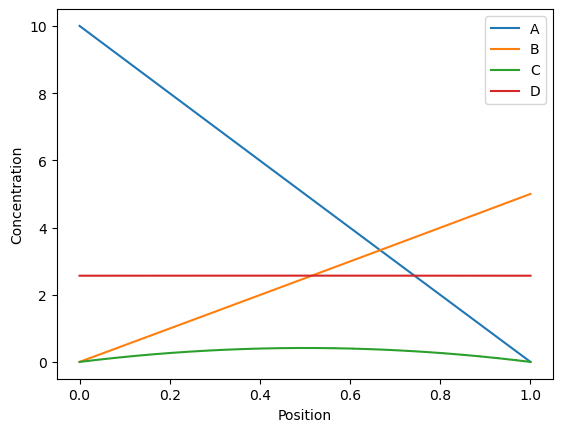

In [45]:
for species in my_model.species:
    plot_profile(species, label=species.name)

plt.xlabel('Position')
plt.ylabel('Concentration')
plt.legend()
plt.show()

### Trapping

```{math}
\ce{H + [ ] <-->[k][p] [H]}
```

$$
\frac{dc_\mathrm{t}}{dt} = -\frac{dc_\mathrm{m}}{dt} = -\frac{dn_\mathrm{empty}}{dt} = k \ c_\mathrm{m} \ n_\mathrm{empty} - p \ c_\mathrm{t}
$$

#### Explicit trapping sites

Here, we treat the empty trapping sites as an explicit species with an initial concentration.

In [ ]:
my_model = F.HydrogenTransportProblem()
my_model.mesh = F.Mesh1D(np.linspace(0, 1, 100))

mobile_H = F.Species("H")
trapped_H = F.Species("H_trapped", mobile=False)
empty_traps = F.Species("empty_traps", mobile=False)

my_model.species = [mobile_H, trapped_H, empty_traps]

my_model.initial_conditions = [
    F.InitialCondition(value=2, species=empty_traps)
]

Solving HydrogenTransportProblem:   0%|          | 0.00/50.0 [00:00<?, ?it/s]

```{note}
Here we set the empty traps as immobile, but they could diffuse in the material too by setting ``mobile=True``.
```

In [ ]:

left_surf = F.SurfaceSubdomain1D(id=1, x=0)
right_surf = F.SurfaceSubdomain1D(id=2, x=1)

material = F.Material(D_0=1, E_D=0)

vol = F.VolumeSubdomain1D(id=1, borders=[0, 1], material=material)

my_model.subdomains = [vol, left_surf, right_surf]

my_model.reactions = [
    F.Reaction(
        reactant=[mobile_H, empty_traps],
        product=[trapped_H],
        k_0=0.01,
        E_k=0,
        p_0=0.1,
        E_p=0,
        volume=vol,
    ),
]

my_model.boundary_conditions = [
    F.FixedConcentrationBC(left_surf, value=10, species=mobile_H),
    F.FixedConcentrationBC(right_surf, value=0, species=mobile_H),
]

my_model.temperature = 300

my_model.settings = F.Settings(atol=1e-10, rtol=1e-10, final_time=50)

my_model.settings.stepsize = F.Stepsize(1)

my_model.initialise()
my_model.run()

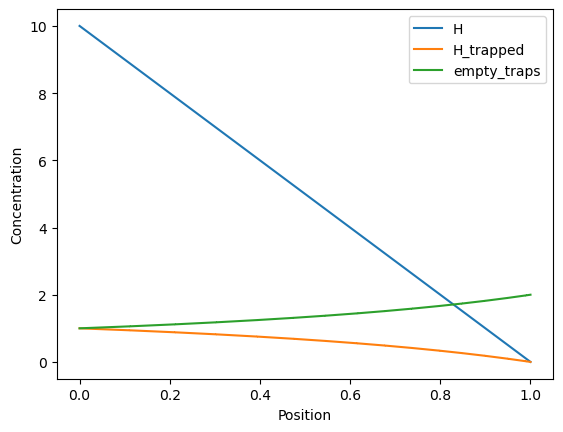

In [49]:
for species in my_model.species:
    plot_profile(species, label=species.name)

plt.xlabel('Position')
plt.ylabel('Concentration')
plt.legend()
plt.show()

#### Implicit trapping sites


$$
n_\mathrm{empty} = n_\mathrm{total} - \sum_i c_i
$$

In [51]:
my_model = F.HydrogenTransportProblem()
my_model.mesh = F.Mesh1D(np.linspace(0, 1, 100))


mobile_H = F.Species("H")
trapped_H = F.Species("H_trapped", mobile=False)
empty_traps = F.ImplicitSpecies(n=2, others=[trapped_H])

my_model.species = [mobile_H, trapped_H]

left_surf = F.SurfaceSubdomain1D(id=1, x=0)
right_surf = F.SurfaceSubdomain1D(id=2, x=1)

material = F.Material(D_0=1, E_D=0)

vol = F.VolumeSubdomain1D(id=1, borders=[0, 1], material=material)

my_model.subdomains = [vol, left_surf, right_surf]

my_model.reactions = [
    F.Reaction(
        reactant=[mobile_H, empty_traps],
        product=[trapped_H],
        k_0=0.01,
        E_k=0,
        p_0=0.1,
        E_p=0,
        volume=vol,
    ),
]

my_model.boundary_conditions = [
    F.FixedConcentrationBC(left_surf, value=10, species=mobile_H),
    F.FixedConcentrationBC(right_surf, value=0, species=mobile_H),
]

my_model.temperature = 300

my_model.settings = F.Settings(atol=1e-10, rtol=1e-10, final_time=50)

my_model.settings.stepsize = F.Stepsize(1)

my_model.initialise()
my_model.run()

Solving HydrogenTransportProblem:   0%|          | 0.00/50.0 [00:00<?, ?it/s]

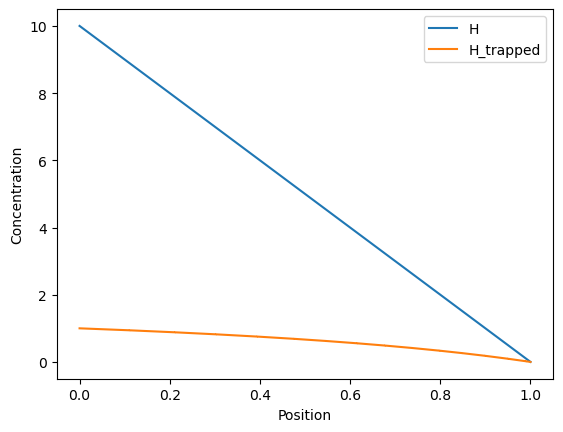

In [52]:
for species in my_model.species:
    plot_profile(species, label=species.name)

plt.xlabel('Position')
plt.ylabel('Concentration')
plt.legend()
plt.show()

#### Multi-occupancy trapping

```{math}
\ce{H + [ ] <-->[k][p] [1H]}
```

```{math}
\ce{H + [H] <-->[k][p] [1H]}
```

```{math}
\ce{H + [2H] <-->[k][p] [3H]}
```

In [65]:
my_model = F.HydrogenTransportProblem()
my_model.mesh = F.Mesh1D(np.linspace(0, 1, 100))


mobile_H = F.Species("H")
trapped_1H = F.Species("1H_trapped", mobile=False)
trapped_2H = F.Species("2H_trapped", mobile=False)
trapped_3H = F.Species("3H_trapped", mobile=False)
empty_traps = F.ImplicitSpecies(n=2, others=[trapped_1H, trapped_2H, trapped_3H])

my_model.species = [mobile_H, trapped_1H, trapped_2H, trapped_3H]

left_surf = F.SurfaceSubdomain1D(id=1, x=0)
right_surf = F.SurfaceSubdomain1D(id=2, x=1)

material = F.Material(D_0=1, E_D=0)

vol = F.VolumeSubdomain1D(id=1, borders=[0, 1], material=material)

my_model.subdomains = [vol, left_surf, right_surf]

my_model.reactions = [
    F.Reaction(
        reactant=[mobile_H, empty_traps],
        product=[trapped_1H],
        k_0=0.01,
        E_k=0,
        p_0=0.1,
        E_p=0,
        volume=vol,
    ),
    F.Reaction(
        reactant=[mobile_H, trapped_1H],
        product=[trapped_2H],
        k_0=0.02,
        E_k=0,
        p_0=0.1,
        E_p=0,
        volume=vol,
    ),
    F.Reaction(
        reactant=[mobile_H, trapped_2H],
        product=[trapped_3H],
        k_0=0.03,
        E_k=0,
        p_0=0.1,
        E_p=0,
        volume=vol,
    ),
]

my_model.boundary_conditions = [
    F.FixedConcentrationBC(left_surf, value=10, species=mobile_H),
    F.FixedConcentrationBC(right_surf, value=0, species=mobile_H),
]

my_model.temperature = 300

my_model.settings = F.Settings(atol=1e-10, rtol=1e-10, final_time=50)

my_model.settings.stepsize = F.Stepsize(1)

my_model.initialise()
my_model.run()

Solving HydrogenTransportProblem:   0%|          | 0.00/50.0 [00:00<?, ?it/s]

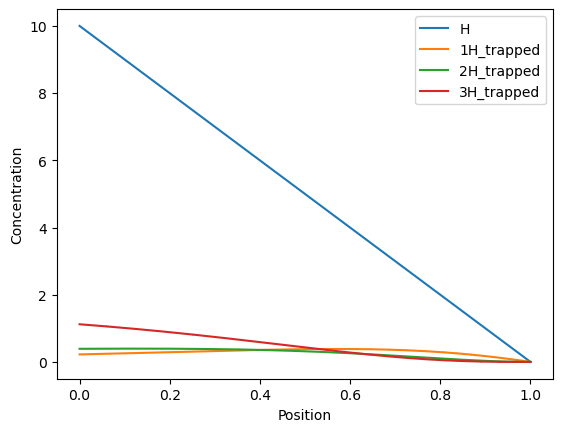

In [66]:
for species in my_model.species:
    plot_profile(species, label=species.name)

plt.xlabel('Position')
plt.ylabel('Concentration')
plt.legend()
plt.show()

### Isotope swapping

```{math}
\ce{H + [T] <-->[k_\mathrm{swap}][k_\mathrm{swap}] T + [H]}
```

In [73]:
my_model = F.HydrogenTransportProblem()
my_model.mesh = F.Mesh1D(np.linspace(0, 1, 100))


mobile_H = F.Species("H")
mobile_T = F.Species("T")
trapped_H = F.Species("H_trapped", mobile=False)
trapped_T = F.Species("T_trapped", mobile=False)

my_model.species = [mobile_H, mobile_T, trapped_H, trapped_T]

my_model.initial_conditions = [
    F.InitialCondition(value=2, species=trapped_T),
]

left_surf = F.SurfaceSubdomain1D(id=1, x=0)
right_surf = F.SurfaceSubdomain1D(id=2, x=1)

material = F.Material(D_0=1, E_D=0)

vol = F.VolumeSubdomain1D(id=1, borders=[0, 1], material=material)

my_model.subdomains = [vol, left_surf, right_surf]

my_model.reactions = [
    F.Reaction(
        reactant=[mobile_H, trapped_T],
        product=[mobile_T, trapped_H],
        k_0=0.005,
        E_k=0,
        p_0=0.005,
        E_p=0,
        volume=vol,
    ),
]

my_model.boundary_conditions = [
    F.FixedConcentrationBC(left_surf, value=10, species=mobile_H),
    F.FixedConcentrationBC(right_surf, value=0, species=mobile_H),
]

my_model.temperature = 300

my_model.settings = F.Settings(atol=1e-10, rtol=1e-10, final_time=10)

my_model.settings.stepsize = F.Stepsize(1)

my_model.initialise()
my_model.run()

Solving HydrogenTransportProblem:   0%|          | 0.00/10.0 [00:00<?, ?it/s]

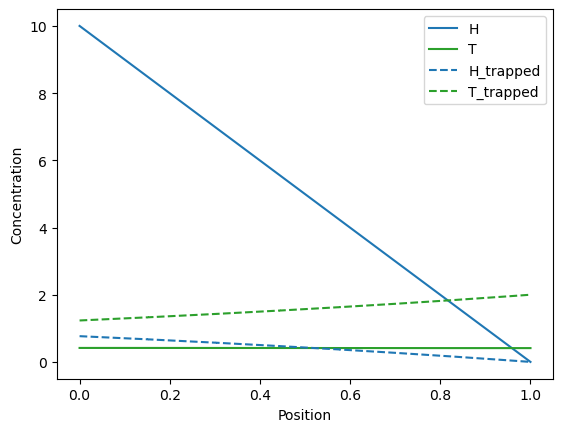

In [77]:
for species in my_model.species:
    if "T" in species.name:
        color="tab:green"
    else:
        color="tab:blue"
    if "trapped" in species.name:
        linestyle="--"
    else:
        linestyle="-"
    plot_profile(species, label=species.name, color=color, linestyle=linestyle)

plt.xlabel('Position')
plt.ylabel('Concentration')
plt.legend()
plt.show()

### Anihilation

```{math}
\ce{A ->[\lambda] \emptyset}
```

In [63]:
my_model = F.HydrogenTransportProblem()
my_model.mesh = F.Mesh1D(np.linspace(0, 1, 100))

A = F.Species("A")

my_model.species = [A]

my_model.initial_conditions = [F.InitialCondition(value=1, species=A)]

left_surf = F.SurfaceSubdomain1D(id=1, x=0)
right_surf = F.SurfaceSubdomain1D(id=2, x=1)

material = F.Material(D_0=1, E_D=0)

vol = F.VolumeSubdomain1D(id=1, borders=[0, 1], material=material)

my_model.subdomains = [vol, left_surf, right_surf]

my_model.reactions = [
    F.Reaction(reactant=[A], k_0=1, E_k=0, volume=vol),
]

my_model.temperature = 300

my_model.settings = F.Settings(atol=1e-10, rtol=1e-10, final_time=1)

my_model.settings.stepsize = F.Stepsize(1)

my_model.initialise()
my_model.run()

Solving HydrogenTransportProblem:   0%|          | 0.00/1.00 [00:00<?, ?it/s]

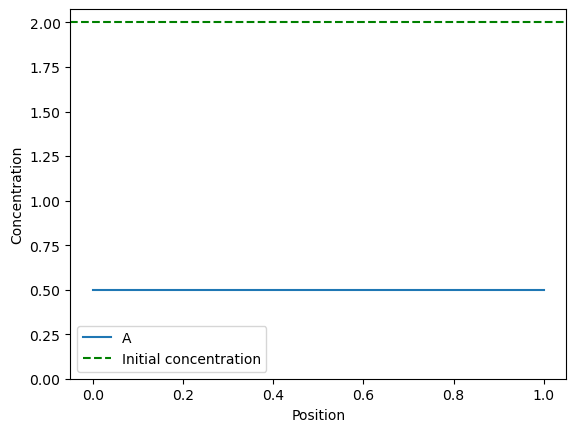

In [64]:
x = my_model.mesh.mesh.geometry.x[:, 0]
c = A.solution.x.array[:]

plt.plot(x, c, label=A.name)
plt.axhline(2, linestyle='--', color='green', label='Initial concentration')

plt.xlabel('Position')
plt.ylabel('Concentration')
plt.ylim(bottom=0)
plt.legend()
plt.show()